In [1]:
#펭수/워크맨 csv 불러와서 시각화 및 머신러닝
# 패키지 import
import datetime as dt
import pandas as pd   #df 분석용
import requests
import time
import urllib.request #
import re     
import konlpy
#import konlpy.tag import Okt

from bs4 import BeautifulSoup
from pandas import DataFrame
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from nltk import FreqDist

In [3]:
# 시각화  
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
import seaborn as sns
from PIL import Image             #워드클라우드용
from wordcloud import WordCloud   #워드클라우드용
fpath = "NotoSansCJKkr-Bold.otf"   #워드클라우드 국문지원을 위한 별도 폰트 path 설정
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
############### Read #################
peng_intro = pd.read_csv('peng_intro.csv')  # 펭수의 intro DF 
work_intro = pd.read_csv('work_intro.csv')  # 워크맨의 intro DF 

peng = pd.read_csv('peng.csv')               #펭수의 동영상list DF
peng_reply = pd.read_csv('peng_reply.csv')   #펭수의 동영상별 댓글list DF

work = pd.read_csv('work.csv')               #워크맨의 동영상list DF
work_reply = pd.read_csv('work_reply.csv')   #워크맨의 동영상별 댓글list DF

############# 구분자 추가 ################
for i in range(len(peng)): peng['구분'] = 1  # 1: 펭수
for i in range(len(work)): work['구분'] = 0 # 0: 워크맨

for i in range(len(peng_reply)): peng_reply['구분'] = 1   
for i in range(len(work_reply)): work_reply['구분'] = 0
    
############## DF 통합 및 정렬 ##################
# 1) 펭수 + 워크맨 intro DF 통합
intro_paw = pd.concat([peng_intro, work_intro])

# 2) 펭수 + 워크맨 동영상list DF 통합 및 정렬
paw = pd.concat([peng,work])
#paw = pd.DataFrame(paw, columns=[['제목','주소','본문내용','조회수','댓글수','좋아요','싫어요','펭수','워크맨']])

# 3) 펭수 + 워크맨 동영상별 댓글list DF 통합 및 정렬
paw_reply = pd.concat([peng_reply,work_reply])
#paw_reply = pd.DataFrame(paw_reply, columns=[['ID','Comment','Like','Title_number','펭수','워크맨']])


In [6]:
intro_paw.head()

,Unnamed: 0,구분,구독자,영상수
0,1,펭수,135만명,133
0,2,워크맨,353만명,35


In [7]:
paw = paw.astype({'좋아요': int})
paw.head()  #  통합한 동영상list DF 확인

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,1
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,1
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,1
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,1
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,1


In [10]:
paw_reply = paw_reply.astype({'구분': int})
paw_reply.head()

,Unnamed: 0,ID,Comment,Like,Title_number,구분
0,0,EBSDocumentary (EBS 다큐),"펭수...곧 백만이네,,, 짜싁 멋지다,,,,날씨가 많이 춥다,,,, 감기 조심허구...",2500,0,1
1,1,펭랑단1호,악플러들 고소하고 EBS 빚 갚자,1300,0,1
2,2,Isabel la,아니 무슨 교육방송이 ㅋㅋㅋ 왠만한 예능프로그램보다 더 잘만들어 자막이고 편집이고 ...,1000,0,1
3,3,gravity,위험한 물품 가지고 있어여? “제 자신” ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,652,0,1
4,4,월드곰탱이,초반 영상부터 다 봐온 사람으로서열심히 한 죄밖에 없는데너무 힘들게 하는듯나쁜 댓글...,924,0,1


In [11]:
paw_reply.describe()  # 통합한 동영상별 댓글list DF 확인

,Unnamed: 0,Like,Title_number,구분
count,3160.000000,3160.000000,3160.0,3160.000000
mean,9.500000,1430.986392,0.0,0.778481
std,5.767194,2652.356452,0.0,0.415335
min,0.000000,0.000000,0.0,0.000000
25%,4.750000,193.000000,0.0,1.000000
50%,9.500000,546.500000,0.0,1.000000
75%,14.250000,1500.000000,0.0,1.000000
max,19.000000,38000.000000,0.0,1.000000


In [12]:
paw.describe()

,Unnamed: 0,좋아요,싫어요,구분
count,158.000000,158.000000,158.000000,158.000000
mean,51.253165,29989.873418,467.550633,0.778481
std,36.693070,32530.949869,685.085234,0.416589
min,0.000000,2400.000000,8.000000,0.000000
25%,19.250000,9925.000000,69.250000,1.000000
50%,43.500000,17500.000000,163.500000,1.000000
75%,82.750000,35750.000000,464.750000,1.000000
max,122.000000,180000.000000,3600.000000,1.000000


In [13]:
intro_paw.describe()

,Unnamed: 0,영상수
count,2.000000,2.000000
mean,1.500000,84.000000
std,0.707107,69.296465
min,1.000000,35.000000
25%,1.250000,59.500000
50%,1.500000,84.000000
75%,1.750000,108.500000
max,2.000000,133.000000


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47566 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51008 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51339 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49325 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53916 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53216 missing from current font.
  font.set_text(s, 0.0, fla

c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44272 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45572 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47329 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44161 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46377 missing from current font.
  font.set_text(s, 0, flags=flags)


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47148 missing from current font.
  font.set_text(s, 0, flags=flags)


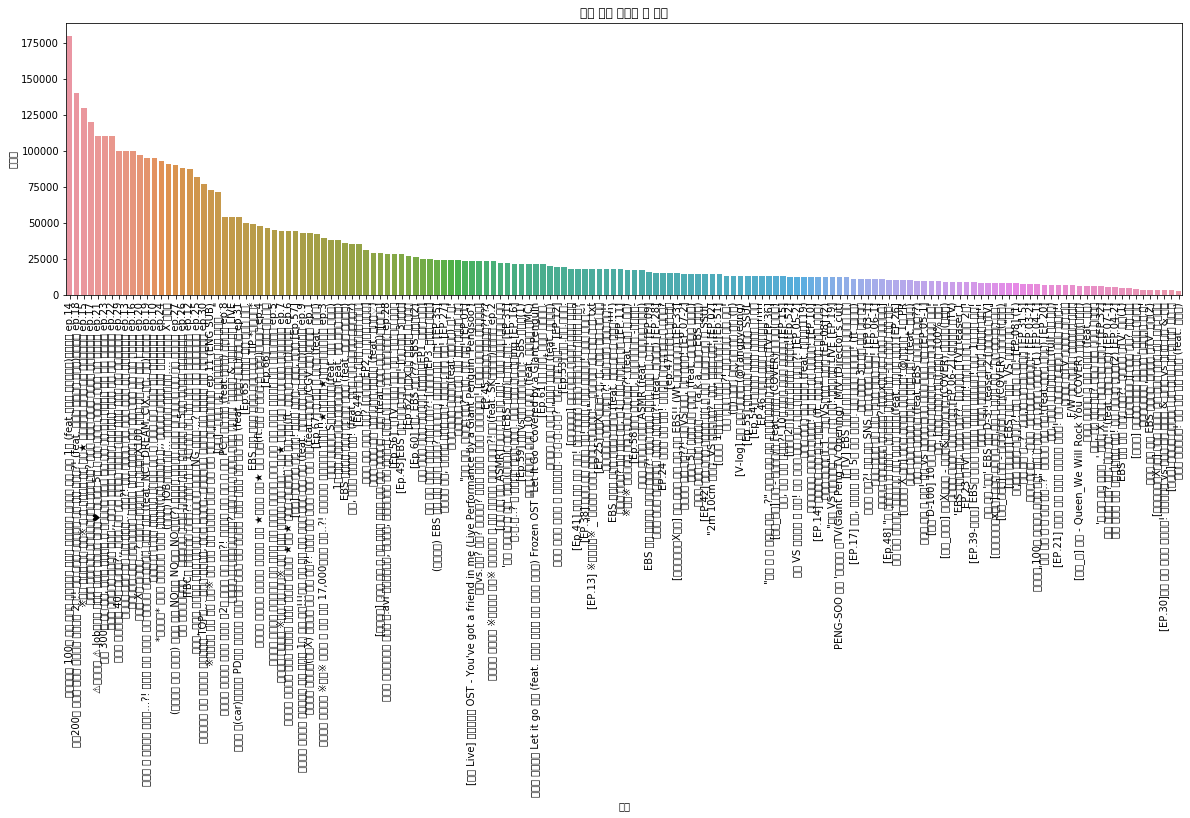

In [14]:
#시각화
fig = plt.figure(figsize=(20,5))
plt.title('가장 많은 좋아요 순 정렬')
sns.barplot(x='제목', y='좋아요', data=paw[['제목', '좋아요']].groupby('제목', as_index=False).mean().sort_values(by='좋아요', ascending=False));
plt.xticks(rotation=90); #x축(country) 회전

# 구분에 따른 요약
#paw[['좋아요','구분']].groupby('구분', as_index=False).mean().sort_values(by='좋아요', ascending=False).head()

In [15]:
############ UNLIKE RATIO 구하기 ############  
# 워킹맨 구독자 수가(353만명) 펭수(134만명)의 3배이상으로, 
# 비율을 구해 서로의 값을 확인 예정

unlike_ratio_list = []
for i in range(len(paw)): 
    unlike_ratio = (paw.iloc[i, 5] / paw.iloc[i,4]) * 100  # 퍼센테이지 표현
    unlike_ratio_ar= round(unlike_ratio,2)                 # 소숫점 2자리까지 표현 
    unlike_ratio_list.append(unlike_ratio_ar)          

paw['unlike_ratio(%)'] = unlike_ratio_list                 # ratio 열 생성

In [16]:
paw.head() 

,Unnamed: 0,제목,주소,조회수,좋아요,싫어요,댓글수,본문내용,구분,unlike_ratio(%)
0,0,[Ep 67] 전 세계 게 섰거라 (feat. 외교부),/watch?v=yUJAvW2Rykc,"1,381,698",42000,749,"6,838",K-펭귄 한다 해외진출,1,1.78
1,1,[Ep.66] 화보 모델 펭수,/watch?v=XUM3sH1kBtw,"1,583,971",46000,455,"7,678",펭수가 화보 모델로서 촬영을 하게 되었다!화보 촬영을 위한 펭수의 눈물(?) 나는 ...,1,0.99
2,2,펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡),/watch?v=LPmyxMH96S8,"604,376",29000,135,"3,921",힙합펭수의 커버영상이 드. 디. 어. 찾아왔다!월미도에서 촬영했던 미공개 영상과 여...,1,0.47
3,3,[Ep.65] 세상에 나쁜 펭귄은 없다.,/watch?v=wedLGh2jxkQ,"1,975,593",50000,548,"6,974",어느 날 갑자기 펭수에게 이상한 행동들이 보인다!? 걱정된 제작진들이 긴급 솔루션 ...,1,1.10
4,4,수험생은 지금 당장 이 영상을 봅니다 (feat. 정승제쌤),/watch?v=25RhzK3HuYM,"651,078",20000,135,"2,760",내일 모레 엄청 큰 시험을 앞둔여러분들을 위해 이 영상을 바칩니당 펭펭,1,0.68


,구분,unlike_ratio(%)
0,0,1.901143
1,1,1.007561


c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54189 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\백송이\appdata\local\programs\python\python36\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, fla

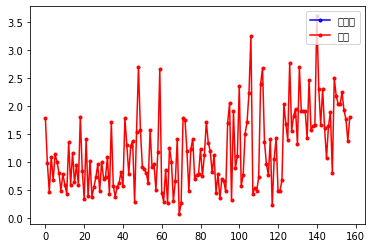

In [17]:
# unlike에 따른 정렬 및 시각화
peng_list=[]  # 현재 df가 통합되어, 색상 분리를 위해 다시 분리
work_list=[]

for i in range(len(paw)):        
    if (paw.iloc[i,8]) =='펭수':   # '구분'이 펭수일 경우
        peng=paw.iloc[i,9]         # 펭수의 ratio를 peng_list에 삽입
        peng_list.append(peng)
    else:
        work=paw.iloc[i,9]         # '구분'이 워크맨일 경우 
        work_list.append(work)     # 워크맨의 ratio를 work_list에 삽입

plt.plot(peng_list, marker='.', color='b')   # 펭수: blue
plt.plot(work_list, marker='.', color='r')   # 워크맨: red
plt.legend(['워크맨', '펭수'], loc='upper right')

# 구분에 따른 요약
paw[['unlike_ratio(%)','구분']].groupby('구분', as_index=False).mean().sort_values(by='unlike_ratio(%)',
                                                                               ascending=False).head()

(-0.5, 799.5, 799.5, -0.5)

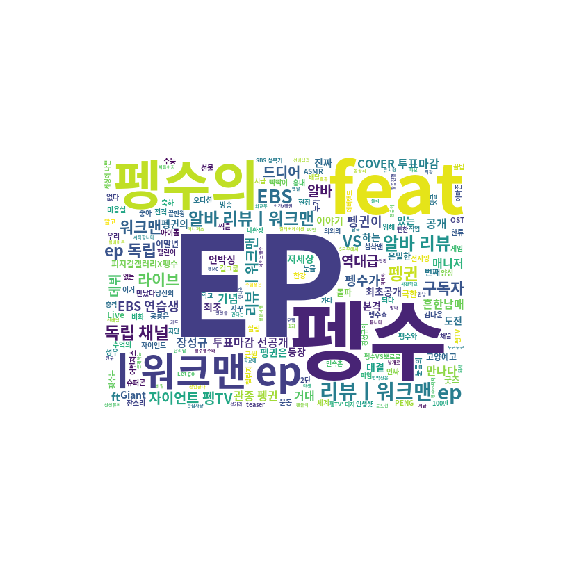

In [67]:
"""# 워드 클라우드 설정
title_l2s=(''.join(paw["제목"])) # paw의 제목df를 string으로

image_test=np.array(Image.open("ytbb.png")) #mask 이미지 설정
wc = WordCloud(max_font_size=200,font_path=fpath,background_color='#FFFFFF',
               width=1200,height=800,mask=image_test).generate(title_l2s)

#사이즈 등 설정
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
"""


# 라이브러리를 호출합니다.
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud,STOPWORDS
fpath = "NotoSansCJKkr-Bold.otf" 


# 워드 클라우드 설정
image_test=np.array(Image.open("peng2.png")) #mask 이미지 설정
title_l2s=(''.join(title_list)) #title_list의 list를 string으로
wc = WordCloud(max_font_size=200,font_path=fpath,stopwords=STOPWORDS,background_color='#FFFFFF',width=1200,height=800,mask=image_test).generate(title_l2s)

#사이즈 등 설정
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')


In [ ]:


import csv
count_nouns_list = []
wdlist= []
f = open('content_nouns.csv', 'rt', encoding='UTF8')
csvReader = csv.reader(f)
for row in csvReader:
    count_nouns_list.append(row)
f.close()

for i in range(l00):
    wdlist.append(count_nouns_list[i][1])
    
#print(wdlist)

# 워드 클라우드 설정
image_test=np.array(Image.open("ytbb.png")) #mask 이미지 설정
title_l2s=(''.join(wdlist)) #title_list의 list를 string으로
print(title_l2s)
wc = WordCloud(max_font_size=200,font_path=fpath,background_color='#FFFFFF',width=1200,height=800,mask=image_test).generate(title_l2s)

#사이즈 등 설정
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')


In [18]:
total_cnt = len(paw_reply['ID'])
cnt_1percent= total_cnt*0.01
print("* 전체 댓글 개수:", len(paw_reply['ID']), ", 전체 댓글의 1% 개수:", cnt_1percent)
print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User ID 빈도수 확인(count):")
print(paw_reply['ID'].value_counts(ascending=False)[:31]) # 빈도수 기준 내림차순

print("/////////////////////////////////////////////////////////////////////////////")
print("* 상위 10% User 빈도수 확인(ratio):")
print(paw_reply['ID'].value_counts(normalize=True)[:31])  # 비율 기준 출력

* 전체 댓글 개수: 3160 , 전체 댓글의 1% 개수: 31.6
/////////////////////////////////////////////////////////////////////////////
* 상위 10% User ID 빈도수 확인(count):
 자이언트 펭TV                         40
 워크맨-Workman                      34
 나눈누                              16
 Jeje                             15
 고잉메리쓰                            11
 펭랑단1호                            10
 펭수쳐돌이                             9
 펭펭                                8
 SAJOgroup                         7
 오석현                               7
 콩절미                               6
 지금이순간                             6
 9 cw                              6
 ᄋᄋ                                6
 JE Choi                           6
 So So                             5
 공인회계사50th                         5
 민트마카롱                             5
 polarin                           5
 인사처TV                             5
 둘기                                5
 오하라                               5
 The great Peng                    5
 

In [19]:
# csv 파일의 columnms 확인
paw.columns
paw_reply.columns

Index(['Unnamed: 0', 'ID', 'Comment', 'Like', 'Title_number', '구분'], dtype='object')

In [20]:
# csv 파일에서 필요한 column만 리스트로 저장
paw_title_list = paw.제목.tolist()
paw_content_list = paw.본문내용.tolist()
paw_reply_list = paw_reply.Comment.tolist()

In [21]:
# 리스트 출력하여 확인
print(paw_title_list[:3])  #부하로 인해 테스트로 3개만 출력

['[Ep 67] 전 세계 게 섰거라 (feat. 외교부)', '[Ep.66]  화보 모델 펭수', '펭수와 팬들의 최강 컬래버레이션 신상뮤비 (feat. 챌린지♡)']


In [72]:
# 형태소 분석
from konlpy.tag import Okt
okt=Okt()

TypeError: Package <Java package kr.lucypark.okt.OktInterface._name> is not Callable

In [ ]:
# 제목 리스트 명사 분석
title_list=[]
for i in range(len(paw_title_list)):
    title_list.append(okt.nouns(paw_title_list[i]))
    
# 본문 내용 명사 분석
content_list=[]
for i in range(len(paw_content_list)):
    content_list.append(okt.nouns(paw_content_list[i]))

# 댓글 내용 명사 분석
reply_list=[]
for i in range(len(paw_reply_list)):
    reply_list.append(okt.nouns(paw_reply_list[i]))

In [ ]:
# 리스트 안의 리스트 하나의 리스트로 만들기
def flatten (n):
    org =[]
    for i in n :
        if (isinstance(i,list)):
            org += flatten(i)
        else:
            org.append(i)
    return org

In [ ]:
flatten(title_list) # 실행되는지 확인

In [ ]:
# 제목, 본문 내용, 댓글 내용 하나의 리스트로 취합
title_f = flatten(title_list)
content_f = flatten(content_list)
reply_f = flatten(reply_list)

In [ ]:
# 단어 빈도수 확인을 위한 패키지 import
from nltk.book import *
import operator
from nltk.corpus import brown
from nltk.corpus import stopwords

In [ ]:
# 제목 빈도수 확인
fdist1 = FreqDist(title_f)
title_dict = {}
content_dict = {}
reply_dict = {}
for w in title_f:
    dict_w[w] = fdist1[w]
title_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(title_dict)

In [349]:
# 본문 내용 빈도수 확인
fdist1 = FreqDist(content_f)
dict_w = {}
for w in content_f:
    dict_w[w] = fdist1[w]
content_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(content_dict)

NameError: name 'content_f' is not defined

In [350]:
# 댓글 내용 빈도수 확인
fdist1 = FreqDist(reply_f)
dict_w = {}
for w in reply_p:
    dict_w[w] = fdist1[w]
reply_dict = sorted(dict_w.items(), key=operator.itemgetter(1), reverse=True)
print(reply_dict)

NameError: name 'reply_f' is not defined

In [351]:
# 빈도수를 데이터프레임 형태로 저장
title_df = DataFrame(title_dict)
content_df = DataFrame(content_dict)
reply_df = DataFrame(reply_dict)

In [352]:
title_df.head() # 데이터 확인

""


In [22]:
####### Machine Learning #################
paw_reply.head() 

,Unnamed: 0,ID,Comment,Like,Title_number,구분
0,0,EBSDocumentary (EBS 다큐),"펭수...곧 백만이네,,, 짜싁 멋지다,,,,날씨가 많이 춥다,,,, 감기 조심허구...",2500,0,1
1,1,펭랑단1호,악플러들 고소하고 EBS 빚 갚자,1300,0,1
2,2,Isabel la,아니 무슨 교육방송이 ㅋㅋㅋ 왠만한 예능프로그램보다 더 잘만들어 자막이고 편집이고 ...,1000,0,1
3,3,gravity,위험한 물품 가지고 있어여? “제 자신” ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ,652,0,1
4,4,월드곰탱이,초반 영상부터 다 봐온 사람으로서열심히 한 죄밖에 없는데너무 힘들게 하는듯나쁜 댓글...,924,0,1


In [23]:
paw_reply.drop('Comment', axis=1, inplace=True)
paw_reply.drop('Like', axis=1, inplace=True)
paw_reply.drop('Title_number', axis=1, inplace=True)

In [24]:
paw_reply.head()

,Unnamed: 0,ID,구분
0,0,EBSDocumentary (EBS 다큐),1
1,1,펭랑단1호,1
2,2,Isabel la,1
3,3,gravity,1
4,4,월드곰탱이,1


In [35]:
X_train = peng_intro("구분", axis=1)  # 예측값
Y_train = peng_intro("구분", axis=1)  # 실제값

"""
X_train = data.drop("Over_mean_suicides", axis=1)
X_train = X_train.drop("suicides/100k pop", axis=1)
X_train = X_train.drop("country", axis=1)
Y_train = data["Over_mean_suicides"]


X_test = paw.drop("구분" , axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape
"""

TypeError: 'DataFrame' object is not callable

In [31]:
# 1. Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, Y_train)

type(X_train)
type(Y_train)

Y_pred = logreg.predict(X_test)
acc_log=logreg.score(X_train, Y_train)
acc_log

pandas.core.series.Series

In [28]:
# 2. Support Vector Machines
svc = SVC()
solver='liblinear'
svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)
acc_svc = svc.score(X_train, Y_train)
print(acc_svc)

ValueError: could not convert string to float: ' 빠나나나나빠나나나빠나나나나빠나나나나나              '

In [ ]:
# 3. Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

In [ ]:
# 4. KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [ ]:
# 5. Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

In [ ]:
# 6. Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

In [ ]:
# 7. Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

In [ ]:
# 8. Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

In [ ]:
# 9. Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd